In [5]:
import pandas as pd
!pip install yfinance
import yfinance as yf
!pip install yahoofinancials
from yahoofinancials import YahooFinancials

  Created wheel for yahoofinancials: filename=yahoofinancials-1.5-cp36-none-any.whl size=15195 sha256=5178eba21c86543ad47cbdf29998f5b2916372414a4ec717a7dcd9bc19f80f72
  Stored in directory: /root/.cache/pip/wheels/42/15/e7/240c5cdc8782b9479ba73404640a3be57bb4053a5c3edd6be5
Successfully built yahoofinancials


In [6]:
tsla_df = yf.download('TSLA', 
                      start='2019-01-01', 
                      end='2019-12-31', 
                      progress=False)
tsla_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,306.100006,315.130005,298.799988,310.119995,310.119995,11658600
2019-01-03,307.000000,309.399994,297.380005,300.359985,300.359985,6965200
2019-01-04,306.000000,318.000000,302.730011,317.690002,317.690002,7394100
2019-01-07,321.720001,336.739990,317.750000,334.959991,334.959991,7551200
2019-01-08,341.959991,344.010010,327.019989,335.350006,335.350006,7008500


In [7]:
tsla_df = yf.download('TSLA')

[*********************100%***********************]  1 of 1 completed


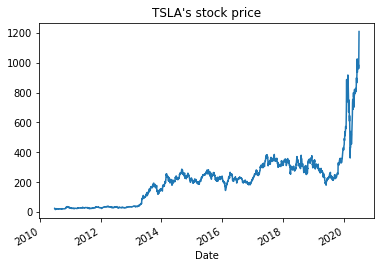

In [8]:
ticker = yf.Ticker('TSLA')

tsla_df = ticker.history(period="max")

tsla_df['Close'].plot(title="TSLA's stock price")

In [9]:
yahoo_financials = YahooFinancials('TSLA')

data = yahoo_financials.get_historical_price_data(start_date='2000-01-01', 
                                                  end_date='2019-12-31', 
                                                  time_interval='weekly')

tsla_df = pd.DataFrame(data['TSLA']['prices'])
tsla_df = tsla_df.drop('date', axis=1).set_index('formatted_date')
tsla_df.head()

,high,low,open,close,volume,adjclose
formatted_date,,,,,,
2010-06-28,30.42,17.540001,19.000000,19.200001,49312000,19.200001
2010-07-05,20.00,14.980000,20.000000,17.400000,25550600,17.400000
2010-07-12,21.50,16.900000,17.950001,20.639999,15438900,20.639999
2010-07-19,22.25,19.500000,21.370001,21.290001,7175700,21.290001
2010-07-26,21.50,19.549999,21.500000,19.940001,3052000,19.940001


In [10]:
assets = ['TSLA', 'MSFT', 'FB']

yahoo_financials = YahooFinancials(assets)

data = yahoo_financials.get_historical_price_data(start_date='2019-01-01', 
                                                  end_date='2019-12-31', 
                                                  time_interval='weekly')

prices_df = pd.DataFrame({
    a: {x['formatted_date']: x['adjclose'] for x in data[a]['prices']} for a in assets
})

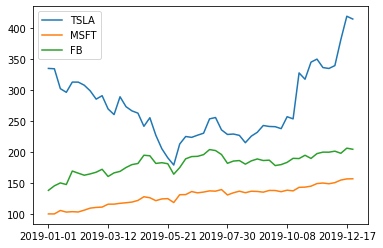

In [11]:
prices_df.plot()